# Pitch Type Prediction App

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import tkinter as tk
from tkinter import ttk
import warnings
warnings.filterwarnings('ignore')

## Import Data and Create DataFrame

In [3]:
df = pd.read_csv("1.csv")
selected_columns = ["break_angle", "break_length", "spin_dir", "pitch_type"]
df = df[selected_columns]
df = df.dropna()
df_sample = df.sample(frac=0.01, random_state=1)
df_sample.head()

,break_angle,break_length,spin_dir,pitch_type
397,-23.9,11.4,74.959,SL
6206,29.8,4.1,213.286,FF
8684,-1.4,6.5,187.121,SL
6917,28.8,4.5,216.802,FF
8720,31.3,3.8,208.861,FF


## Data Analysis Visualizations

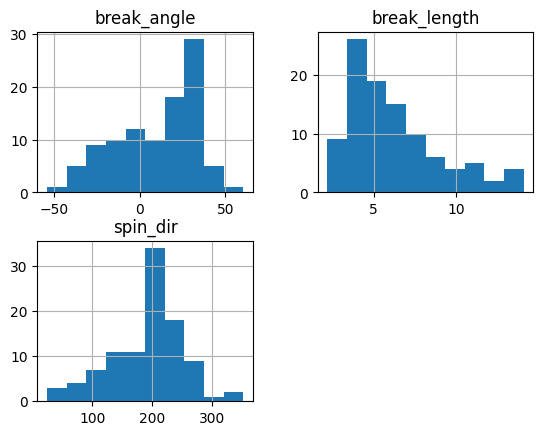

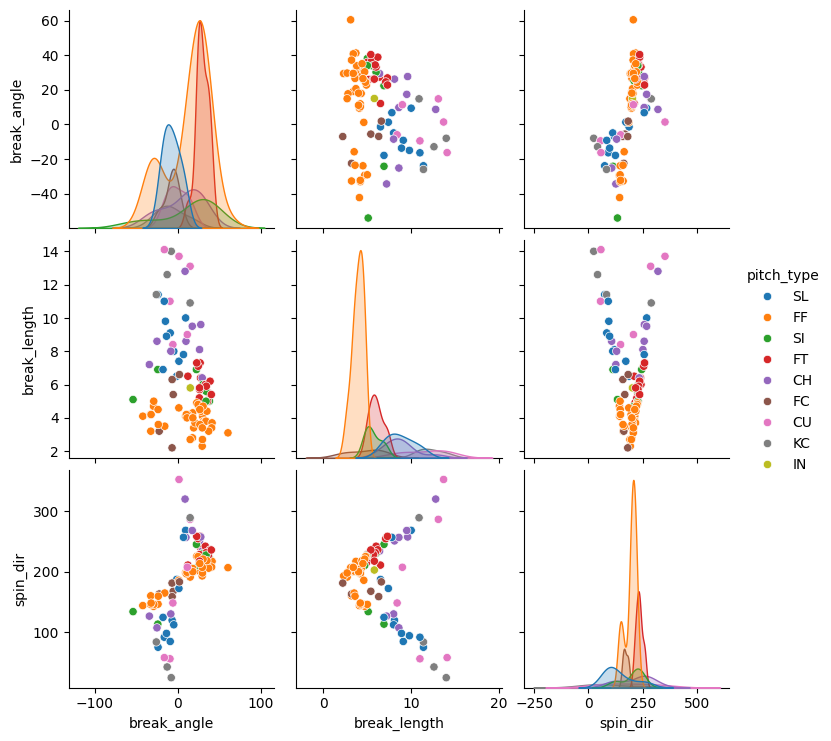

In [4]:
df_sample.hist()
sns.pairplot(df_sample, hue='pitch_type')
plt.show()

## Create Training Set

In [5]:
X = df_sample.drop("pitch_type", axis=1)
y = df_sample["pitch_type"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3, random_state=1)

## Create K-Nearest Neighbors Classifier

In [6]:
myKn_model = KNeighborsClassifier(n_neighbors=14)

## Train Model

In [7]:
myKn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

## Measure Accuracy of KNN Model

In [8]:
y_pred_Kn = myKn_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_Kn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.43333333333333335


## Confusion Matrix

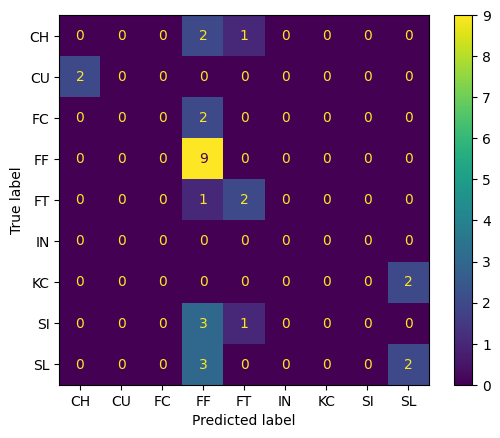

In [9]:
cm = metrics.confusion_matrix(y_test, y_pred_Kn, labels=myKn_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= myKn_model.classes_)
disp.plot()
plt.show()

## Create User Interface

In [21]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np  # Assuming you'll need this for some computations

def predict_pitch_type(change):
    # Get user input values
    user_input = [float(entry.value) for entry in data_entries]

    # Make a prediction (replace this with your actual prediction logic)
    prediction = np.random.choice(["Fastball", "Curveball", "Changeup"])

    # Display the predicted pitch type
    result_label.value = f"Predicted Pitch Type: {prediction}"

# Create entry labels and input fields
data_labels = ["Break Angle:", "Break Length:", "Spin Direction:"]
data_entries = []

for label_text in data_labels:
    entry = widgets.FloatText(description=label_text)
    entry.observe(predict_pitch_type, names='value')
    data_entries.append(entry)

# Create a button to make predictions
predict_button = widgets.Button(description="Predict Pitch Type")
predict_button.on_click(predict_pitch_type)

# Display the predicted pitch type
result_label = widgets.Label(value="")

# Arrange the widgets using VBox and HBox
input_widgets = widgets.VBox(data_entries)
output_widgets = widgets.VBox([predict_button, result_label])
ui = widgets.HBox([input_widgets, output_widgets])

## Run User Interface
Run the following cell to start the application.

Pitch Key:
* FF = four seam fastball
* SL = slider
* FT = two seam fastball
* KC = knucle curve
* CU = curveball
* CH = changeup
* SI = sinker
* FC = cutter
* FS = fastball
* EP = ephus
* KN = knucleball
* IN = intentional ball
* SC = screwball
* PO = Pitchout

In [22]:
display(ui)